# <b><span style='color:#F1A424'>AutoML - Regression - Fish Weight Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used : Fish Weight Dataset**

**Features**:

- `Species`: Species name of fish
- `Length1`: Vertical length in cm
- `Length2`: Diagonal length in cm
- `Length3`: Cross length in cm
- `Height`: Height in cm
- `Width`: Diagonal width in cm

**Target Variable**:

- `Weight`: Weight of fish in gram

        
**Objective**:

The primary objective is typically to build a model that can accurately predict weight of fish in gram.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','fish')

In [5]:
# Fetching in teradata dataframe
fish_df = DataFrame("fish")

In [6]:
# first 5 rows
fish_df.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,685,31.4,34.0,39.2,15.9936,5.3704
Bream,920,35.0,38.5,44.1,18.0369,6.3063
Bream,975,37.4,41.0,45.9,18.6354,6.7473
Bream,290,24.0,26.3,31.2,12.48,4.3056
Bream,340,29.5,32.0,37.3,13.9129,5.0728
Bream,575,31.3,34.0,39.5,15.1285,5.5695
Bream,1000,33.5,37.0,42.6,18.957,6.603
Bream,500,26.8,29.7,34.5,14.1795,5.2785
Bream,363,26.3,29.0,33.5,12.73,4.4555
Bream,475,28.4,31.0,36.2,14.2628,5.1042


In [7]:
# fish_df dataset
fish_df.shape

(159, 7)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
fish_df_sample = fish_df.sample(frac = [0.8, 0.2])

In [9]:
fish_df_sample.head()

Species,Weight,Length1,Length2,Length3,Height,Width,sampleid
Bream,920,35.0,38.5,44.1,18.0369,6.3063,2
Bream,1000,33.5,37.0,42.6,18.957,6.603,1
Bream,720,32.0,35.0,40.6,16.3618,6.09,2
Bream,700,30.4,33.0,38.5,14.938,5.1975,1
Bream,650,31.0,33.5,38.7,14.4738,5.7276,1
Bream,500,29.1,31.5,36.4,13.7592,4.368,1
Bream,450,26.8,29.7,34.7,13.6024,4.9274,1
Bream,700,30.4,33.0,38.3,14.8604,5.2854,1
Bream,975,37.4,41.0,45.9,18.6354,6.7473,1
Bream,450,27.6,30.0,35.1,14.0049,4.8438,1


In [10]:
# Fetching train and test data
fish_df_train= fish_df_sample[fish_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
fish_df_test = fish_df_sample[fish_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
fish_df_train.shape

(127, 7)

In [12]:
# test data shape
fish_df_test.shape

(32, 7)

In [13]:
#train dataset
fish_df_train.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,475,28.4,31.0,36.2,14.2628,5.1042
Bream,340,29.5,32.0,37.3,13.9129,5.0728
Bream,600,29.4,32.0,37.2,14.9544,5.1708
Bream,700,30.4,33.0,38.3,14.8604,5.2854
Bream,610,30.9,33.5,38.6,15.633,5.1338
Bream,650,31.0,33.5,38.7,14.4738,5.7276
Bream,700,30.4,33.0,38.5,14.938,5.1975
Bream,500,28.7,31.0,36.2,14.3714,4.8146
Bream,450,27.6,30.0,35.1,14.0049,4.8438
Bream,450,26.8,29.7,34.7,13.6024,4.9274


In [14]:
# test dataset
fish_df_test.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,500,28.5,30.7,36.2,14.2266,4.9594
Bream,725,31.8,35.0,40.9,16.36,6.0532
Bream,575,31.3,34.0,39.5,15.1285,5.5695
Bream,920,35.0,38.5,44.1,18.0369,6.3063
Parkki,170,19.0,20.7,23.2,9.396,3.4104
Parkki,90,16.3,17.7,19.8,7.4052,2.673
Parkki,273,23.0,25.0,28.0,11.088,4.144
Bream,720,32.0,35.0,40.6,16.3618,6.09
Bream,685,31.4,34.0,39.2,15.9936,5.3704
Bream,242,23.2,25.4,30.0,11.52,4.02


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoML instance
# Excluded 'glm' from model training.
# Keeping early stopping timer threshold to 300 sec and max_models to 5
# and verbose level 2 for detailed loggging

aml = AutoML(task_type="Regression", 
             exclude=['glm'],
             max_runtime_secs=300,
             max_models=5,
             verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 127
Total Columns in the data: 7

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
Width,FLOAT,127,0,None,0,127,0,0.0,100.0
Weight,INTEGER,127,0,None,0,127,0,0.0,100.0
Length1,FLOAT,127,0,None,0,127,0,0.0,100.0
Height,FLOAT,127,0,None,0,127,0,0.0,100.0
Length3,FLOAT,127,0,None,0,127,0,0.0,100.0
Length2,FLOAT,127,0,None,0,127,0,0.0,100.0
Species,VARCHAR(20) CHARACTER SET LATIN,127,0,0,None,None,None,0.0,100.0



Statistics of Data:


func,Weight,Length1,Length2,Length3,Height,Width
50%,270,25,26.5,29,7.68,4.248
count,127,127,127,127,127,127
mean,382.787,25.804,27.942,30.72,8.903,4.383
min,5,7.5,8.4,8.8,1.728,1.048
max,1550,56,60,64,18.957,7.796
75%,615,32.25,35,38.9,12.366,5.478
25%,122.5,19.35,21.15,23.35,5.927,3.402
std,333.548,9.495,10.19,11.075,4.283,1.661



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
Species                   7         

No Futile columns found.

Target Column Distribution:


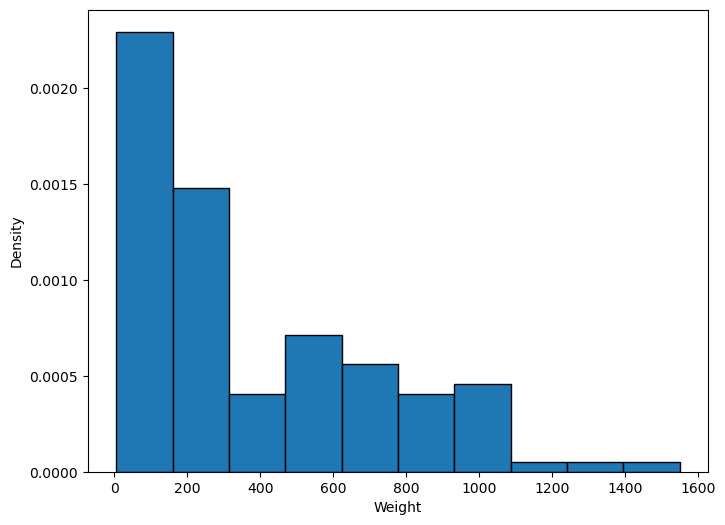

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    Length3           0.787402
1     Weight           0.787402
2    Length2           0.787402
3    Length1           0.787402


Analysis completed. No action taken.                                                    


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259572932400"' - 5/18


['Species']


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
1,0,0,0,0,0,0,620,31.5,34.5,39.7,15.5227,5.2801,50
1,0,0,0,0,0,0,700,31.9,35.0,40.5,16.2405,5.589,74
1,0,0,0,0,0,0,850,32.8,36.0,41.6,16.8896,6.1984,82
1,0,0,0,0,0,0,430,26.5,29.0,34.0,12.444,5.134,90
1,0,0,0,0,0,0,500,28.7,31.0,36.2,14.3714,4.8146,106
1,0,0,0,0,0,0,475,28.4,31.0,36.2,14.2628,5.1042,114
0,1,0,0,0,0,0,55,13.5,14.7,16.5,6.8475,2.3265,24
0,1,0,0,0,0,0,150,18.4,20.0,22.4,8.8928,3.2928,40
0,1,0,0,0,0,0,140,19.0,20.7,23.2,8.5376,3.2944,48
0,1,0,0,0,0,0,145,19.8,21.5,24.1,9.7364,3.1571,56


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
0,0,0,0,0,1,0,8,10.8,11.3,12.6,1.9782,1.2852,15
0,0,0,0,1,0,0,150,20.4,22.0,24.7,5.8045,3.7544,20
0,0,0,1,0,0,0,456,40.0,42.5,45.5,7.28,4.3225,21
0,0,0,0,0,1,0,9,11.3,11.8,13.1,2.2139,1.1659,23
0,0,0,0,1,0,0,290,24.0,26.0,29.2,8.8768,4.4968,28
0,0,0,1,0,0,0,300,31.7,34.0,37.8,5.7078,4.158,29
1,0,0,0,0,0,0,650,31.0,33.5,38.7,14.4738,5.7276,10
1,0,0,0,0,0,0,955,35.0,38.5,44.0,18.084,6.292,18
1,0,0,0,0,0,0,700,30.4,33.0,38.5,14.938,5.1975,34
1,0,0,0,0,0,0,925,36.2,39.5,45.3,18.7542,6.7497,42


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
1,0,0,0,0,0,0,600,29.4,32.0,37.2,15.438,5.58,186
1,0,0,0,0,0,0,340,29.5,32.0,37.3,13.9129,5.0728,210
1,0,0,0,0,0,0,500,29.1,31.5,36.4,13.7592,4.368,226
0,0,0,1,0,0,0,300,32.7,35.0,38.8,5.9364,4.3844,13
0,0,0,1,0,0,0,950,48.3,51.7,55.1,8.9262,6.1712,53
0,1,0,0,0,0,0,145,19.8,21.5,24.1,9.7364,3.1571,56
0,0,0,0,1,0,0,160,20.5,22.5,25.3,7.0334,3.8203,60
0,0,0,0,1,0,0,140,21.0,22.5,25.0,6.55,3.325,68
0,0,0,0,1,0,0,120,18.6,20.0,22.2,6.216,3.5742,100
0,0,0,0,0,0,1,1000,37.3,40.0,43.5,12.354,6.525,125


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    Length1           0.787402
1    Length2           0.787402
2     Weight           0.787402
3    Length3           0.787402


['Length1', 'Length3', 'Weight', 'Length2']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259827417036"' - 7/18


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
0,0,0,1,0,0,0,456,40.0,42.5,45.5,7.28,4.3225,21
0,0,0,0,1,0,0,290,24.0,26.0,29.2,8.8768,4.4968,28
0,0,0,1,0,0,0,300,31.7,34.0,37.8,5.7078,4.158,29
0,0,0,0,0,1,0,7,10.1,10.6,11.6,1.7284,1.1484,31
0,0,0,0,1,0,0,110,19.1,20.8,23.1,6.1677,3.3957,36
0,0,0,0,0,1,0,12,11.5,12.2,13.4,2.0904,1.3936,39
1,0,0,0,0,0,0,700,30.4,33.0,38.5,14.938,5.1975,34
1,0,0,0,0,0,0,620,31.5,34.5,39.7,15.5227,5.2801,50
1,0,0,0,0,0,0,680,31.8,35.0,40.6,15.4686,6.1306,58
1,0,0,0,0,0,0,700,30.4,33.0,38.3,14.8604,5.2854,66


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258808188917"' - 8/18
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258440941519"'


['Species_1', 'Species_2', 'Species_6', 'Species_5', 'Species_0', 'Species_4', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


['Length1', 'Length2', 'Length3', 'Height', 'Width']


Species_1,Species_2,Species_6,Species_0,Species_5,Species_4,Weight,id,Length1,Length2,Length3,Height,Width
0,0,0,0,0,1,145,12,-0.5077969396130096,-0.5313165395357263,-0.5256057398819317,-0.4795248815495484,-0.42294242398958354
1,0,0,0,0,0,200,16,-0.4257873196755089,-0.4229739290021795,-0.3784757636850101,0.3538272536263038,-0.3524764015637178
0,0,0,1,0,0,955,18,1.1909737590923626,1.256336534267796,1.406701280837639,2.0911169145594584,1.246944093636155
0,0,0,0,0,1,150,20,-0.5195125996040812,-0.5313165395357263,-0.4863710795627528,-0.665732015608885,-0.2972232509914502
0,0,0,0,1,0,9,23,-1.5856376587915906,-1.6364111669779036,-1.624176228818947,-1.4718513013014989,-1.8723640027129813
1,0,0,0,0,0,55,24,-1.3278931389880169,-1.322217596430618,-1.2906816161059242,-0.4315699215361961,-1.1661216397815504
0,0,0,0,0,0,456,21,1.7767567586459392,1.689706976401983,1.5538312570345605,-0.3344701078387484,0.04847404900970932
0,0,0,0,1,0,8,15,-1.6442159587469483,-1.690582472244677,-1.6732195542179207,-1.524767893413611,-1.7997681782276118
0,0,0,1,0,0,650,10,0.7223473594495013,0.7146234816000618,0.8868420316085162,1.2805972673674921,0.9034982986693281
1,0,0,0,0,0,120,8,-0.8592667393451556,-0.8563443711363666,-0.819865692275775,-0.08477204357446787,-0.8061242402380085


Species_1,Species_2,Species_6,Species_0,Species_5,Species_4,Weight,id,Length1,Length2,Length3,Height,Width
0,0,0,1,0,0,340,210,0.5466124595834283,0.5521095657997417,0.7495207204913887,1.15467059568449,0.5050427590798908
0,0,0,0,0,0,300,13,0.9215135792977177,0.8771373974003821,0.8966506966883103,-0.6361193787841605,0.08614111971921813
0,0,0,0,0,0,950,53,2.7491565379048764,2.6864589933106138,2.495463104694859,0.03511535645891236,1.17343549683957
0,0,0,0,0,1,160,60,-0.5077969396130096,-0.4771452342689529,-0.427519089083984,-0.3898338397642758,-0.257122120785366
0,0,0,0,0,1,120,100,-0.7303944794433685,-0.7480017606028199,-0.7315877065576222,-0.5733468749464579,-0.40687763131218424
0,0,1,0,0,0,1000,125,1.4604339388870076,1.418850450068116,1.357657955438665,0.8046847007181287,1.3887280593116884
0,0,0,0,0,1,140,68,-0.4492186396576519,-0.4771452342689529,-0.4569450843233684,-0.4983611228656544,-0.5585195379488483
0,0,0,1,0,0,500,226,0.4997498196191424,0.4979382605329683,0.6612427347732358,1.1201636792329346,0.07616147578325791
0,0,0,1,0,0,600,186,0.5348967995923567,0.5521095657997417,0.7397120554115945,1.4970681121468656,0.813681503245686
1,0,0,0,0,0,145,56,-0.5898065595505102,-0.5854878448024997,-0.5452230700415213,0.21701193231480162,-0.6606891853176123


['Species_1', 'Species_2', 'Species_6', 'Species_5', 'Species_0', 'Species_4', 'Species_3', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


['r_Length1', 'r_Length2', 'r_Length3', 'r_Height', 'r_Width']


r_Species_6,Weight,r_Species_2,r_Species_0,r_Species_5,id,r_Species_1,r_Species_3,r_Species_4,r_Length1,r_Length2,r_Length3,r_Height,r_Width
0,145,0,0,0,12,0,0,1,-0.5077969396130096,-0.5313165395357263,-0.5256057398819317,-0.4795248815495484,-0.42294242398958354
0,200,0,0,0,16,1,0,0,-0.4257873196755089,-0.4229739290021795,-0.3784757636850101,0.3538272536263038,-0.3524764015637178
0,955,0,1,0,18,0,0,0,1.1909737590923626,1.256336534267796,1.406701280837639,2.0911169145594584,1.246944093636155
0,150,0,0,0,20,0,0,1,-0.5195125996040812,-0.5313165395357263,-0.4863710795627528,-0.665732015608885,-0.2972232509914502
0,9,0,0,1,23,0,0,0,-1.5856376587915906,-1.6364111669779036,-1.624176228818947,-1.4718513013014989,-1.8723640027129813
0,55,0,0,0,24,1,0,0,-1.3278931389880169,-1.322217596430618,-1.2906816161059242,-0.4315699215361961,-1.1661216397815504
0,456,0,0,0,21,0,1,0,1.7767567586459392,1.689706976401983,1.5538312570345605,-0.3344701078387484,0.04847404900970932
0,8,0,0,1,15,0,0,0,-1.6442159587469483,-1.690582472244677,-1.6732195542179207,-1.524767893413611,-1.7997681782276118
0,650,0,1,0,10,0,0,0,0.7223473594495013,0.7146234816000618,0.8868420316085162,1.2805972673674921,0.9034982986693281
0,120,0,0,0,8,1,0,0,-0.8592667393451556,-0.8563443711363666,-0.819865692275775,-0.08477204357446787,-0.8061242402380085


r_Species_6,Weight,r_Species_2,r_Species_0,r_Species_5,id,r_Species_1,r_Species_3,r_Species_4,r_Length1,r_Length2,r_Length3,r_Height,r_Width
0,340,0,1,0,210,0,0,0,0.5466124595834283,0.5521095657997417,0.7495207204913887,1.15467059568449,0.5050427590798908
0,300,0,0,0,13,0,1,0,0.9215135792977177,0.8771373974003821,0.8966506966883103,-0.6361193787841605,0.08614111971921813
0,950,0,0,0,53,0,1,0,2.7491565379048764,2.6864589933106138,2.495463104694859,0.03511535645891236,1.17343549683957
0,160,0,0,0,60,0,0,1,-0.5077969396130096,-0.4771452342689529,-0.427519089083984,-0.3898338397642758,-0.257122120785366
0,120,0,0,0,100,0,0,1,-0.7303944794433685,-0.7480017606028199,-0.7315877065576222,-0.5733468749464579,-0.40687763131218424
1,1000,0,0,0,125,0,0,0,1.4604339388870076,1.418850450068116,1.357657955438665,0.8046847007181287,1.3887280593116884
0,140,0,0,0,68,0,0,1,-0.4492186396576519,-0.4771452342689529,-0.4569450843233684,-0.4983611228656544,-0.5585195379488483
0,500,0,1,0,226,0,0,0,0.4997498196191424,0.4979382605329683,0.6612427347732358,1.1201636792329346,0.07616147578325791
0,600,0,1,0,186,0,0,0,0.5348967995923567,0.5521095657997417,0.7397120554115945,1.4970681121468656,0.813681503245686
0,145,0,0,0,56,1,0,0,-0.5898065595505102,-0.5854878448024997,-0.5452230700415213,0.21701193231480162,-0.6606891853176123


['Length1', 'Length2', 'Length3', 'Height', 'Width']


Species_1,Species_2,Species_6,Species_5,Species_0,Species_4,Weight,id,Species_3,Length1,Length2,Length3,Height,Width
0,0,0,0,1,0,680,58,0,0.8160726393780738,0.8771373974003821,1.0732066681246162,1.50393806428361,1.1487297929493272
0,0,0,0,1,0,850,82,0,0.9332292392887888,0.9854800079339289,1.171293318922564,1.8229642729866695,1.1899871014162848
0,0,0,0,1,0,430,90,0,0.1951426598512824,0.2270817341991013,0.42583477285816074,0.8248904422967887,0.5422838693774988
0,0,0,0,1,0,290,98,0,-0.09774883992550597,-0.06544331424147498,0.15119215062390692,0.8329727389282524,0.0381901476366773
0,0,0,0,1,0,475,114,0,0.4177401996816414,0.44376695526619486,0.6416254046136461,1.2332260287775234,0.5241501261280097
0,0,0,0,1,0,390,130,0,0.32401491975306945,0.3354243447326481,0.5239214236561085,0.8756293044832004,0.2721032652575994
0,0,0,1,0,0,8,15,0,-1.6442159587469485,-1.690582472244677,-1.6732195542179218,-1.524767893413611,-1.7997681782276118
0,0,0,0,0,1,150,20,0,-0.5195125996040814,-0.5313165395357263,-0.4863710795627536,-0.665732015608885,-0.2972232509914502
0,0,0,0,0,0,456,21,1,1.7767567586459396,1.689706976401983,1.55383125703456,-0.3344701078387484,0.04847404900970932
0,0,0,1,0,0,9,23,0,-1.5856376587915908,-1.6364111669779036,-1.6241762288189479,-1.4718513013014989,-1.8723640027129813


Species_1,Species_2,Species_6,Species_5,Species_0,Species_4,Weight,id,Species_3,Length1,Length2,Length3,Height,Width
0,0,0,0,1,0,600,186,0,0.5348967995923568,0.5521095657997417,0.7397120554115939,1.4970681121468656,0.813681503245686
0,0,0,0,1,0,340,210,0,0.5466124595834284,0.5521095657997417,0.7495207204913881,1.15467059568449,0.5050427590798908
0,0,0,0,1,0,500,226,0,0.4997498196191425,0.4979382605329683,0.6612427347732353,1.1201636792329346,0.07616147578325791
0,0,0,0,0,0,300,13,1,0.9215135792977179,0.8771373974003821,0.8966506966883098,-0.6361193787841605,0.08614111971921813
0,0,0,0,0,0,950,53,1,2.749156537904877,2.6864589933106138,2.495463104694859,0.03511535645891236,1.17343549683957
1,0,0,0,0,0,145,56,0,-0.5898065595505103,-0.5854878448024997,-0.545223070041522,0.21701193231480162,-0.6606891853176123
0,0,0,0,0,1,160,60,0,-0.5077969396130098,-0.4771452342689529,-0.4275190890839848,-0.3898338397642758,-0.257122120785366
0,0,0,0,0,1,140,68,0,-0.449218639657652,-0.4771452342689529,-0.45694508432336917,-0.4983611228656544,-0.5585195379488483
0,0,0,0,0,1,120,100,0,-0.7303944794433687,-0.7480017606028199,-0.7315877065576231,-0.5733468749464579,-0.40687763131218424
0,0,1,0,0,0,1000,125,0,1.4604339388870078,1.418850450068116,1.3576579554386645,0.8046847007181287,1.3887280593116884


['col_0', 'col_1', 'col_2', 'col_3']


response_column : Weight                                                                                                                              
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1, 20, 30)
seed : 42
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : Weight
name : svm
model_type : regression
lambda1 : (0.001, 0.02, 0.1)
alpha : (0.15, 0.85)
tolerance : (0.001, 0.01)
learning_rate : ('Invtime', 'Adaptive', 'constant')
initial_eta : (0.05, 0.1)
momentum : (0.65, 0.8, 0.95)
nesterov : True
intercept : True
iter_num_no_change : (5, 10, 50)
local_sgd_iterations  : (10, 20)
iter_max : (300, 200, 400)
batch_size : (10, 50, 60, 80)
Total number of models for svm : 15

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258437614003"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263744833586"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266127071337"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259392326330"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259288462823"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259599899898"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259514378291"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259592614689"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259544102038"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262390368757"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258691697954"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259695929673"'


,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,XGBOOST_1,rfe,54.571676,7341.517795,0.072873,85.682657,0.269950,0.931157,0.867610
1,2,DECISIONFOREST_2,pca,55.659965,11377.368654,0.040907,106.664749,0.202254,0.893312,0.872990
2,3,DECISIONFOREST_0,lasso,75.766026,14051.254006,0.303610,118.537986,0.551008,0.868238,0.764711
3,4,XGBOOST_0,lasso,156.833994,46359.848153,0.222249,215.313372,0.471432,0.565274,0.223703
4,5,XGBOOST_2,pca,207.323017,70865.505868,0.478950,266.205759,0.692062,0.335479,0.208904


In [16]:
# Fitting train data
aml.fit(fish_df_train, fish_df_train.Weight)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,XGBOOST_1,rfe,54.571676,7341.517795,0.072873,85.682657,0.269950,0.931157,0.867610
1,2,DECISIONFOREST_2,pca,55.659965,11377.368654,0.040907,106.664749,0.202254,0.893312,0.872990
2,3,DECISIONFOREST_0,lasso,75.766026,14051.254006,0.303610,118.537986,0.551008,0.868238,0.764711
3,4,XGBOOST_0,lasso,156.833994,46359.848153,0.222249,215.313372,0.471432,0.565274,0.223703
4,5,XGBOOST_2,pca,207.323017,70865.505868,0.478950,266.205759,0.692062,0.335479,0.208904


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,XGBOOST_1,rfe,54.571676,7341.517795,0.072873,85.682657,0.26995,0.931157,0.86761


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(fish_df_test)

Data Transformation started ...


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259280283555"'⫾⫾⫾｜ 50% - 5/10


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
0,0,1,0,0,0,0,900,36.5,39.0,41.4,11.1366,7.4934,48
0,0,1,0,0,0,0,145,22.0,24.0,25.5,6.375,3.825,72
0,0,1,0,0,0,0,700,34.5,37.0,39.4,10.835,6.2646,80
0,0,1,0,0,0,0,1100,39.0,42.0,44.6,12.8002,6.8684,88
0,0,1,0,0,0,0,145,20.7,22.7,24.2,5.9532,3.63,104
0,0,0,0,1,0,0,0,19.0,20.5,22.8,6.4752,3.3516,12
1,0,0,0,0,0,0,685,31.4,34.0,39.2,15.9936,5.3704,26
1,0,0,0,0,0,0,720,32.0,35.0,40.6,16.3618,6.09,42
1,0,0,0,0,0,0,920,35.0,38.5,44.1,18.0369,6.3063,50
1,0,0,0,0,0,0,242,23.2,25.4,30.0,11.52,4.02,58


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260413585539"'⫾⫾⫾｜ 60% - 6/10


id,Species_1,Species_2,Species_6,Species_5,Species_0,Species_4,Length1,Length2,Length3,Height,Width,Weight
18,0,0,0,0,1,0,31.3,34.0,39.5,15.1285,5.5695,575
48,0,1,0,0,0,0,36.5,39.0,41.4,11.1366,7.4934,900
56,0,1,0,0,0,0,18.2,20.0,21.0,5.082,2.772,85
72,0,1,0,0,0,0,22.0,24.0,25.5,6.375,3.825,145
88,0,1,0,0,0,0,39.0,42.0,44.6,12.8002,6.8684,1100
96,0,1,0,0,0,0,40.2,43.5,46.0,12.604,8.142,1000
8,1,0,0,0,0,0,23.0,25.0,28.0,11.088,4.144,273
16,1,0,0,0,0,0,19.0,20.7,23.2,9.396,3.4104,170
24,1,0,0,0,0,0,16.3,17.7,19.8,7.4052,2.673,90
80,0,1,0,0,0,0,34.5,37.0,39.4,10.835,6.2646,700


Species_1,Species_2,Species_6,Species_0,Species_5,Species_4,Weight,id,Length1,Length2,Length3,Height,Width
1,0,0,0,0,0,90,24,-0.9998546592380139,-0.9971897648299776,-0.9669956684726967,-0.30636167622043536,-0.9552712358906827
0,0,0,1,0,0,725,34,0.8160726393780737,0.8771373974003821,1.1026326633640007,1.7040647092082453,1.101630741690588
0,0,0,1,0,0,575,18,0.757494339422716,0.7687947868668352,0.965311352246874,1.427582811940253,0.8072920970671746
0,0,0,1,0,0,500,10,0.42945585967271305,0.41126417210613075,0.6416254046136467,1.2250988304981068,0.43603717235197037
0,1,0,0,0,0,85,56,-0.777257119407655,-0.7480017606028199,-0.8492916875151594,-0.8279392188375693,-0.8950282633504351
0,1,0,0,0,0,145,72,-0.3320620397469366,-0.3146313184686327,-0.4079017589243945,-0.5376500648241592,-0.2542621008768895
0,1,0,0,0,0,700,80,1.132395459137005,1.0938226184674757,0.9555026871670791,0.4636566845183071,1.2302707860846118
0,1,0,0,0,0,1100,88,1.659600158735224,1.6355356711352096,1.4655532713164077,0.9048602773003281,1.5976920670927097
0,1,0,0,0,0,1000,96,1.8001880786280826,1.7980495869355297,1.6028745824335344,0.8608117606588499,2.372696610802403
0,1,0,0,0,0,900,48,1.3667086589584356,1.3105078395345693,1.1516759887629746,0.5313683696307928,1.978013863432658


id,Species_1,Species_2,Species_6,Species_5,Species_0,Species_4,Species_3,Length1,Length2,Length3,Height,Width,Weight
24,1,0,0,0,0,0,0,16.3,17.7,19.8,7.4052,2.673,90
34,0,0,0,0,1,0,0,31.8,35.0,40.9,16.36,6.0532,725
18,0,0,0,0,1,0,0,31.3,34.0,39.5,15.1285,5.5695,575
10,0,0,0,0,1,0,0,28.5,30.7,36.2,14.2266,4.9594,500
56,0,1,0,0,0,0,0,18.2,20.0,21.0,5.082,2.772,85
72,0,1,0,0,0,0,0,22.0,24.0,25.5,6.375,3.825,145
80,0,1,0,0,0,0,0,34.5,37.0,39.4,10.835,6.2646,700
88,0,1,0,0,0,0,0,39.0,42.0,44.6,12.8002,6.8684,1100
96,0,1,0,0,0,0,0,40.2,43.5,46.0,12.604,8.142,1000
48,0,1,0,0,0,0,0,36.5,39.0,41.4,11.1366,7.4934,900


r_Species_6,Weight,r_Species_2,r_Species_0,r_Species_5,id,r_Species_1,r_Species_3,r_Species_4,r_Length1,r_Length2,r_Length3,r_Height,r_Width
0,90,0,0,0,24,1,0,0,-0.9998546592380139,-0.9971897648299776,-0.9669956684726967,-0.30636167622043536,-0.9552712358906827
0,725,0,1,0,34,0,0,0,0.8160726393780737,0.8771373974003821,1.1026326633640007,1.7040647092082453,1.101630741690588
0,575,0,1,0,18,0,0,0,0.757494339422716,0.7687947868668352,0.965311352246874,1.427582811940253,0.8072920970671746
0,500,0,1,0,10,0,0,0,0.42945585967271305,0.41126417210613075,0.6416254046136467,1.2250988304981068,0.43603717235197037
0,85,1,0,0,56,0,0,0,-0.777257119407655,-0.7480017606028199,-0.8492916875151594,-0.8279392188375693,-0.8950282633504351
0,145,1,0,0,72,0,0,0,-0.3320620397469366,-0.3146313184686327,-0.4079017589243945,-0.5376500648241592,-0.2542621008768895
0,700,1,0,0,80,0,0,0,1.132395459137005,1.0938226184674757,0.9555026871670791,0.4636566845183071,1.2302707860846118
0,1100,1,0,0,88,0,0,0,1.659600158735224,1.6355356711352096,1.4655532713164077,0.9048602773003281,1.5976920670927097
0,1000,1,0,0,96,0,0,0,1.8001880786280826,1.7980495869355297,1.6028745824335344,0.8608117606588499,2.372696610802403
0,900,1,0,0,48,0,0,0,1.3667086589584356,1.3105078395345693,1.1516759887629746,0.5313683696307928,1.978013863432658


Species_1,Species_2,Species_6,Species_5,Species_0,Species_4,Weight,id,Species_3,Length1,Length2,Length3,Height,Width
0,0,0,0,1,0,575,18,0,0.7574943394227162,0.7687947868668352,0.9653113522468735,1.427582811940253,0.8072920970671746
0,1,0,0,0,0,900,48,0,1.3667086589584359,1.3105078395345693,1.1516759887629742,0.5313683696307928,1.978013863432658
0,1,0,0,0,0,85,56,0,-0.7772571194076551,-0.7480017606028199,-0.8492916875151603,-0.8279392188375693,-0.8950282633504351
0,1,0,0,0,0,145,72,0,-0.33206203974693665,-0.3146313184686327,-0.4079017589243953,-0.5376500648241592,-0.2542621008768895
0,1,0,0,0,0,1100,88,0,1.6596001587352243,1.6355356711352096,1.4655532713164072,0.9048602773003281,1.5976920670927097
0,1,0,0,0,0,1000,96,0,1.800188078628083,1.7980495869355297,1.602874582433534,0.8608117606588499,2.372696610802403
1,0,0,0,0,0,273,8,0,-0.21490543983622132,-0.20628870793508589,-0.16268513192952586,0.5204572691783166,-0.06014585602497977
1,0,0,0,0,0,170,16,0,-0.6835318394790827,-0.6721619332293371,-0.6335010557596752,0.1405893274995159,-0.5065523676969578
1,0,0,0,0,0,90,24,0,-0.9998546592380141,-0.9971897648299776,-0.9669956684726975,-0.30636167622043536,-0.9552712358906827
0,1,0,0,0,0,700,80,0,1.1323954591370051,1.0938226184674757,0.9555026871670785,0.4636566845183071,1.2302707860846118


,id,col_0,col_1,col_2,col_3,Weight
0,8,0.115677,-0.611270,-0.017106,0.076870,273
1,50,-3.242292,-1.046575,0.087476,-0.143496,920
2,16,1.105625,-0.666388,-0.031383,0.047767,170
3,34,-2.537278,-1.027536,0.011648,-0.107204,725
4,24,1.927638,-0.582409,0.054400,-0.003428,90
5,18,-2.157075,-0.906958,0.131781,-0.161331,575
6,10,-1.451870,-0.999100,0.132479,-0.199819,500
7,48,-2.826629,0.886842,-0.745693,0.140491,900
8,56,1.816076,0.374067,-0.459557,-0.260857,85
9,72,0.814612,0.480974,-0.533226,-0.166739,145


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : XGBOOST_1 
Feature Selection Method : rfe

Prediction : 
   id  Prediction  Confidence_Lower  Confidence_upper  Weight
0  24   99.216619         99.216619         99.216619      90
1  34  689.713849        689.713849        689.713849     725
2  18  640.558842        640.558842        640.558842     575
3  10  497.603128        497.603128        497.603128     500
4  56   78.395238         78.395238         78.395238      85
5  72  180.365158        180.365158        180.365158     145
6  80  688.718066        688.718066        688.718066     700
7  88  997.299083        997.299083        997.299083    1100
8  96  993.389844        993.389844        993.389844    1000
9  48  694.301187        694.301187        694.301187     900

Performance Metrics : 
          MAE           MSE      MSLE  MAPE  MPE        RMSE     RMSL

In [22]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,Weight
12,121.402186,121.402186,121.402186,0
15,13.187301,13.187301,13.187301,12
16,146.337876,146.337876,146.337876,170
18,640.5588419999999,640.5588419999999,640.5588419999999,575
21,299.76053099999996,299.76053099999996,299.76053099999996,345
23,46.662701999999996,46.662701999999996,46.662701999999996,19
20,413.809287,413.809287,413.809287,272
13,604.410272,604.410272,604.410272,500
10,497.60312799999997,497.60312799999997,497.60312799999997,500
8,203.65442,203.65442,203.65442,273


In [23]:
# Generating prediction and metrics on test data
prediction = aml.predict(fish_df_test, 2)

Data Transformation started ...


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263130331355"'⫾⫾⫾｜ 50% - 5/10


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
1,0,0,0,0,0,0,920,35.0,38.5,44.1,18.0369,6.3063,50
1,0,0,0,0,0,0,725,31.8,35.0,40.9,16.36,6.0532,34
1,0,0,0,0,0,0,575,31.3,34.0,39.5,15.1285,5.5695,18
1,0,0,0,0,0,0,500,28.5,30.7,36.2,14.2266,4.9594,10
0,0,1,0,0,0,0,320,27.8,30.0,31.6,7.6156,4.7716,40
0,0,1,0,0,0,0,900,36.5,39.0,41.4,11.1366,7.4934,48
0,0,1,0,0,0,0,85,18.2,20.0,21.0,5.082,2.772,56
0,0,1,0,0,0,0,145,22.0,24.0,25.5,6.375,3.825,72
0,0,1,0,0,0,0,700,34.5,37.0,39.4,10.835,6.2646,80
0,0,1,0,0,0,0,1100,39.0,42.0,44.6,12.8002,6.8684,88


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260370449430"'⫾⫾⫾｜ 60% - 6/10


id,Species_1,Species_2,Species_6,Species_5,Species_0,Species_4,Length1,Length2,Length3,Height,Width,Weight
24,1,0,0,0,0,0,16.3,17.7,19.8,7.4052,2.673,90
34,0,0,0,0,1,0,31.8,35.0,40.9,16.36,6.0532,725
18,0,0,0,0,1,0,31.3,34.0,39.5,15.1285,5.5695,575
10,0,0,0,0,1,0,28.5,30.7,36.2,14.2266,4.9594,500
56,0,1,0,0,0,0,18.2,20.0,21.0,5.082,2.772,85
72,0,1,0,0,0,0,22.0,24.0,25.5,6.375,3.825,145
80,0,1,0,0,0,0,34.5,37.0,39.4,10.835,6.2646,700
88,0,1,0,0,0,0,39.0,42.0,44.6,12.8002,6.8684,1100
96,0,1,0,0,0,0,40.2,43.5,46.0,12.604,8.142,1000
48,0,1,0,0,0,0,36.5,39.0,41.4,11.1366,7.4934,900


Species_1,Species_2,Species_6,Species_0,Species_5,Species_4,Weight,id,Length1,Length2,Length3,Height,Width
0,0,0,1,0,0,575,18,0.757494339422716,0.7687947868668352,0.965311352246874,1.427582811940253,0.8072920970671746
0,1,0,0,0,0,900,48,1.3667086589584356,1.3105078395345693,1.1516759887629746,0.5313683696307928,1.978013863432658
0,1,0,0,0,0,85,56,-0.777257119407655,-0.7480017606028199,-0.8492916875151594,-0.8279392188375693,-0.8950282633504351
0,1,0,0,0,0,145,72,-0.3320620397469366,-0.3146313184686327,-0.4079017589243945,-0.5376500648241592,-0.2542621008768895
0,1,0,0,0,0,1100,88,1.659600158735224,1.6355356711352096,1.4655532713164077,0.9048602773003281,1.5976920670927097
0,1,0,0,0,0,1000,96,1.8001880786280826,1.7980495869355297,1.6028745824335344,0.8608117606588499,2.372696610802403
1,0,0,0,0,0,273,8,-0.2149054398362213,-0.20628870793508589,-0.16268513192952513,0.5204572691783166,-0.06014585602497977
1,0,0,0,0,0,170,16,-0.6835318394790826,-0.6721619332293371,-0.6335010557596744,0.1405893274995159,-0.5065523676969578
1,0,0,0,0,0,90,24,-0.9998546592380139,-0.9971897648299776,-0.9669956684726967,-0.30636167622043536,-0.9552712358906827
0,1,0,0,0,0,700,80,1.132395459137005,1.0938226184674757,0.9555026871670791,0.4636566845183071,1.2302707860846118


id,Species_1,Species_2,Species_6,Species_5,Species_0,Species_4,Species_3,Length1,Length2,Length3,Height,Width,Weight
24,1,0,0,0,0,0,0,16.3,17.7,19.8,7.4052,2.673,90
34,0,0,0,0,1,0,0,31.8,35.0,40.9,16.36,6.0532,725
18,0,0,0,0,1,0,0,31.3,34.0,39.5,15.1285,5.5695,575
10,0,0,0,0,1,0,0,28.5,30.7,36.2,14.2266,4.9594,500
56,0,1,0,0,0,0,0,18.2,20.0,21.0,5.082,2.772,85
72,0,1,0,0,0,0,0,22.0,24.0,25.5,6.375,3.825,145
80,0,1,0,0,0,0,0,34.5,37.0,39.4,10.835,6.2646,700
88,0,1,0,0,0,0,0,39.0,42.0,44.6,12.8002,6.8684,1100
96,0,1,0,0,0,0,0,40.2,43.5,46.0,12.604,8.142,1000
48,0,1,0,0,0,0,0,36.5,39.0,41.4,11.1366,7.4934,900


r_Species_6,Weight,r_Species_2,r_Species_0,r_Species_5,id,r_Species_1,r_Species_3,r_Species_4,r_Length1,r_Length2,r_Length3,r_Height,r_Width
0,575,0,1,0,18,0,0,0,0.757494339422716,0.7687947868668352,0.965311352246874,1.427582811940253,0.8072920970671746
0,900,1,0,0,48,0,0,0,1.3667086589584356,1.3105078395345693,1.1516759887629746,0.5313683696307928,1.978013863432658
0,85,1,0,0,56,0,0,0,-0.777257119407655,-0.7480017606028199,-0.8492916875151594,-0.8279392188375693,-0.8950282633504351
0,145,1,0,0,72,0,0,0,-0.3320620397469366,-0.3146313184686327,-0.4079017589243945,-0.5376500648241592,-0.2542621008768895
0,1100,1,0,0,88,0,0,0,1.659600158735224,1.6355356711352096,1.4655532713164077,0.9048602773003281,1.5976920670927097
0,1000,1,0,0,96,0,0,0,1.8001880786280826,1.7980495869355297,1.6028745824335344,0.8608117606588499,2.372696610802403
0,273,0,0,0,8,1,0,0,-0.2149054398362213,-0.20628870793508589,-0.16268513192952513,0.5204572691783166,-0.06014585602497977
0,170,0,0,0,16,1,0,0,-0.6835318394790826,-0.6721619332293371,-0.6335010557596744,0.1405893274995159,-0.5065523676969578
0,90,0,0,0,24,1,0,0,-0.9998546592380139,-0.9971897648299776,-0.9669956684726967,-0.30636167622043536,-0.9552712358906827
0,700,1,0,0,80,0,0,0,1.132395459137005,1.0938226184674757,0.9555026871670791,0.4636566845183071,1.2302707860846118


Species_1,Species_2,Species_6,Species_5,Species_0,Species_4,Weight,id,Species_3,Length1,Length2,Length3,Height,Width
1,0,0,0,0,0,90,24,0,-0.9998546592380141,-0.9971897648299776,-0.9669956684726975,-0.30636167622043536,-0.9552712358906827
0,0,0,0,1,0,725,34,0,0.8160726393780738,0.8771373974003821,1.1026326633640002,1.7040647092082453,1.101630741690588
0,0,0,0,1,0,575,18,0,0.7574943394227162,0.7687947868668352,0.9653113522468735,1.427582811940253,0.8072920970671746
0,0,0,0,1,0,500,10,0,0.4294558596727131,0.41126417210613075,0.6416254046136461,1.2250988304981068,0.43603717235197037
0,1,0,0,0,0,85,56,0,-0.7772571194076551,-0.7480017606028199,-0.8492916875151603,-0.8279392188375693,-0.8950282633504351
0,1,0,0,0,0,145,72,0,-0.33206203974693665,-0.3146313184686327,-0.4079017589243953,-0.5376500648241592,-0.2542621008768895
0,1,0,0,0,0,700,80,0,1.1323954591370051,1.0938226184674757,0.9555026871670785,0.4636566845183071,1.2302707860846118
0,1,0,0,0,0,1100,88,0,1.6596001587352243,1.6355356711352096,1.4655532713164072,0.9048602773003281,1.5976920670927097
0,1,0,0,0,0,1000,96,0,1.800188078628083,1.7980495869355297,1.602874582433534,0.8608117606588499,2.372696610802403
0,1,0,0,0,0,900,48,0,1.3667086589584359,1.3105078395345693,1.1516759887629742,0.5313683696307928,1.978013863432658


,id,col_0,col_1,col_2,col_3,Weight
0,8,0.115677,-0.611270,-0.017106,0.076870,273
1,50,-3.242292,-1.046575,0.087476,-0.143496,920
2,16,1.105625,-0.666388,-0.031383,0.047767,170
3,34,-2.537278,-1.027536,0.011648,-0.107204,725
4,24,1.927638,-0.582409,0.054400,-0.003428,90
5,18,-2.157075,-0.906958,0.131781,-0.161331,575
6,10,-1.451870,-0.999100,0.132479,-0.199819,500
7,48,-2.826629,0.886842,-0.745693,0.140491,900
8,56,1.816076,0.374067,-0.459557,-0.260857,85
9,72,0.814612,0.480974,-0.533226,-0.166739,145


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : DECISIONFOREST_2 
Feature Selection Method : pca

Prediction : 
   id  prediction  confidence_lower  confidence_upper  Weight
0  16  150.000000        150.000000        150.000000     170
1  24   89.000000         89.000000         89.000000      90
2  18  660.000000        660.000000        660.000000     575
3  10  494.500000        494.500000        494.500000     500
4  56   89.000000         89.000000         89.000000      85
5  72  165.000000        165.000000        165.000000     145
6  48  950.454545        950.454545        950.454545     900
7  34  687.000000        687.000000        687.000000     725
8  50  950.454545        950.454545        950.454545     920
9   8  365.000000        365.000000        365.000000     273

Performance Metrics : 
         MAE           MSE      MSLE  MAPE  MPE        RMSE   

In [24]:
# Printing prediction
prediction.head()

id,prediction,confidence_lower,confidence_upper,Weight
12,123.5,123.5,123.5,0
15,10.0,10.0,10.0,12
16,150.0,150.0,150.0,170
18,660.0,660.0,660.0,575
21,494.5,494.5,494.5,345
23,65.0,65.0,65.0,19
20,301.5,301.5,301.5,272
13,660.0,660.0,660.0,500
10,494.5,494.5,494.5,500
8,365.0,365.0,365.0,273


In [25]:
remove_context()

True